In [3]:
from PIL import Image
import cv2
import numpy as np
import glob

def find_exterior_edges(image_path):
    # Load the image
    img = Image.open(image_path)

    # Convert the image to grayscale
    gray_img = img.convert("L")

    # Convert PIL Image to numpy array
    np_img = np.array(gray_img)

    np_blurred = cv2.GaussianBlur(np_img, (5, 5), 0)
   
    # apply morphology
    # Apply adaptive thresholding
    binary = cv2.adaptiveThreshold(np_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
   
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask for exterior edges
    exterior_edges_mask = np.zeros_like(binary)
    
    # Draw filled contours on the mask
    cv2.drawContours(exterior_edges_mask, contours, -1, (255), thickness=cv2.FILLED)

    # Apply erosion and dilation for refining the contour
    kernel = np.ones((9, 9), np.uint8)
    exterior_edges_mask = cv2.erode(exterior_edges_mask, kernel, iterations=2)
    exterior_edges_mask = cv2.dilate(exterior_edges_mask, kernel, iterations=1)

    #  Smoothen the mask
    smooth_mask = cv2.medianBlur(exterior_edges_mask, 9)
    smooth_mask = cv2.GaussianBlur(smooth_mask, (3, 3), 0)

    return smooth_mask

def remove_background(image_path, edges_mask):
    # Load the image
    img = Image.open(image_path)

    # Convert the image to RGBA mode
    img = img.convert("RGBA")

    # Invert the edges mask
    inverted_edges_mask = 255 - edges_mask

    # Convert the inverted edges mask to PIL Image
    inverted_edges_img = Image.fromarray(inverted_edges_mask, mode='L')

    # Create a new image with alpha channel
    new_img = Image.new("RGBA", img.size, (255, 255, 255, 0))

    # Composite the original image and the inverted contour mask
    new_img.paste(img, (0, 0), img)
    new_img.paste((255, 255, 255, 0), (0, 0), inverted_edges_img)

    return new_img


In [4]:
image_path='Images-2/18-uml-class-diagram-example-gui.jpg'
output_dir='Output-1'
output_img=remove_background(image_path=image_path,edges_mask=find_exterior_edges(image_path))
output_img.save(output_dir+f'/'+image_path.split('/')[-1].split('.')[0] +'.png')
    

In [21]:
image_path='Images-2/10_uml.jpg'

In [22]:
img = Image.open(image_path)

# Convert the image to grayscale
gray_img = img.convert("L")



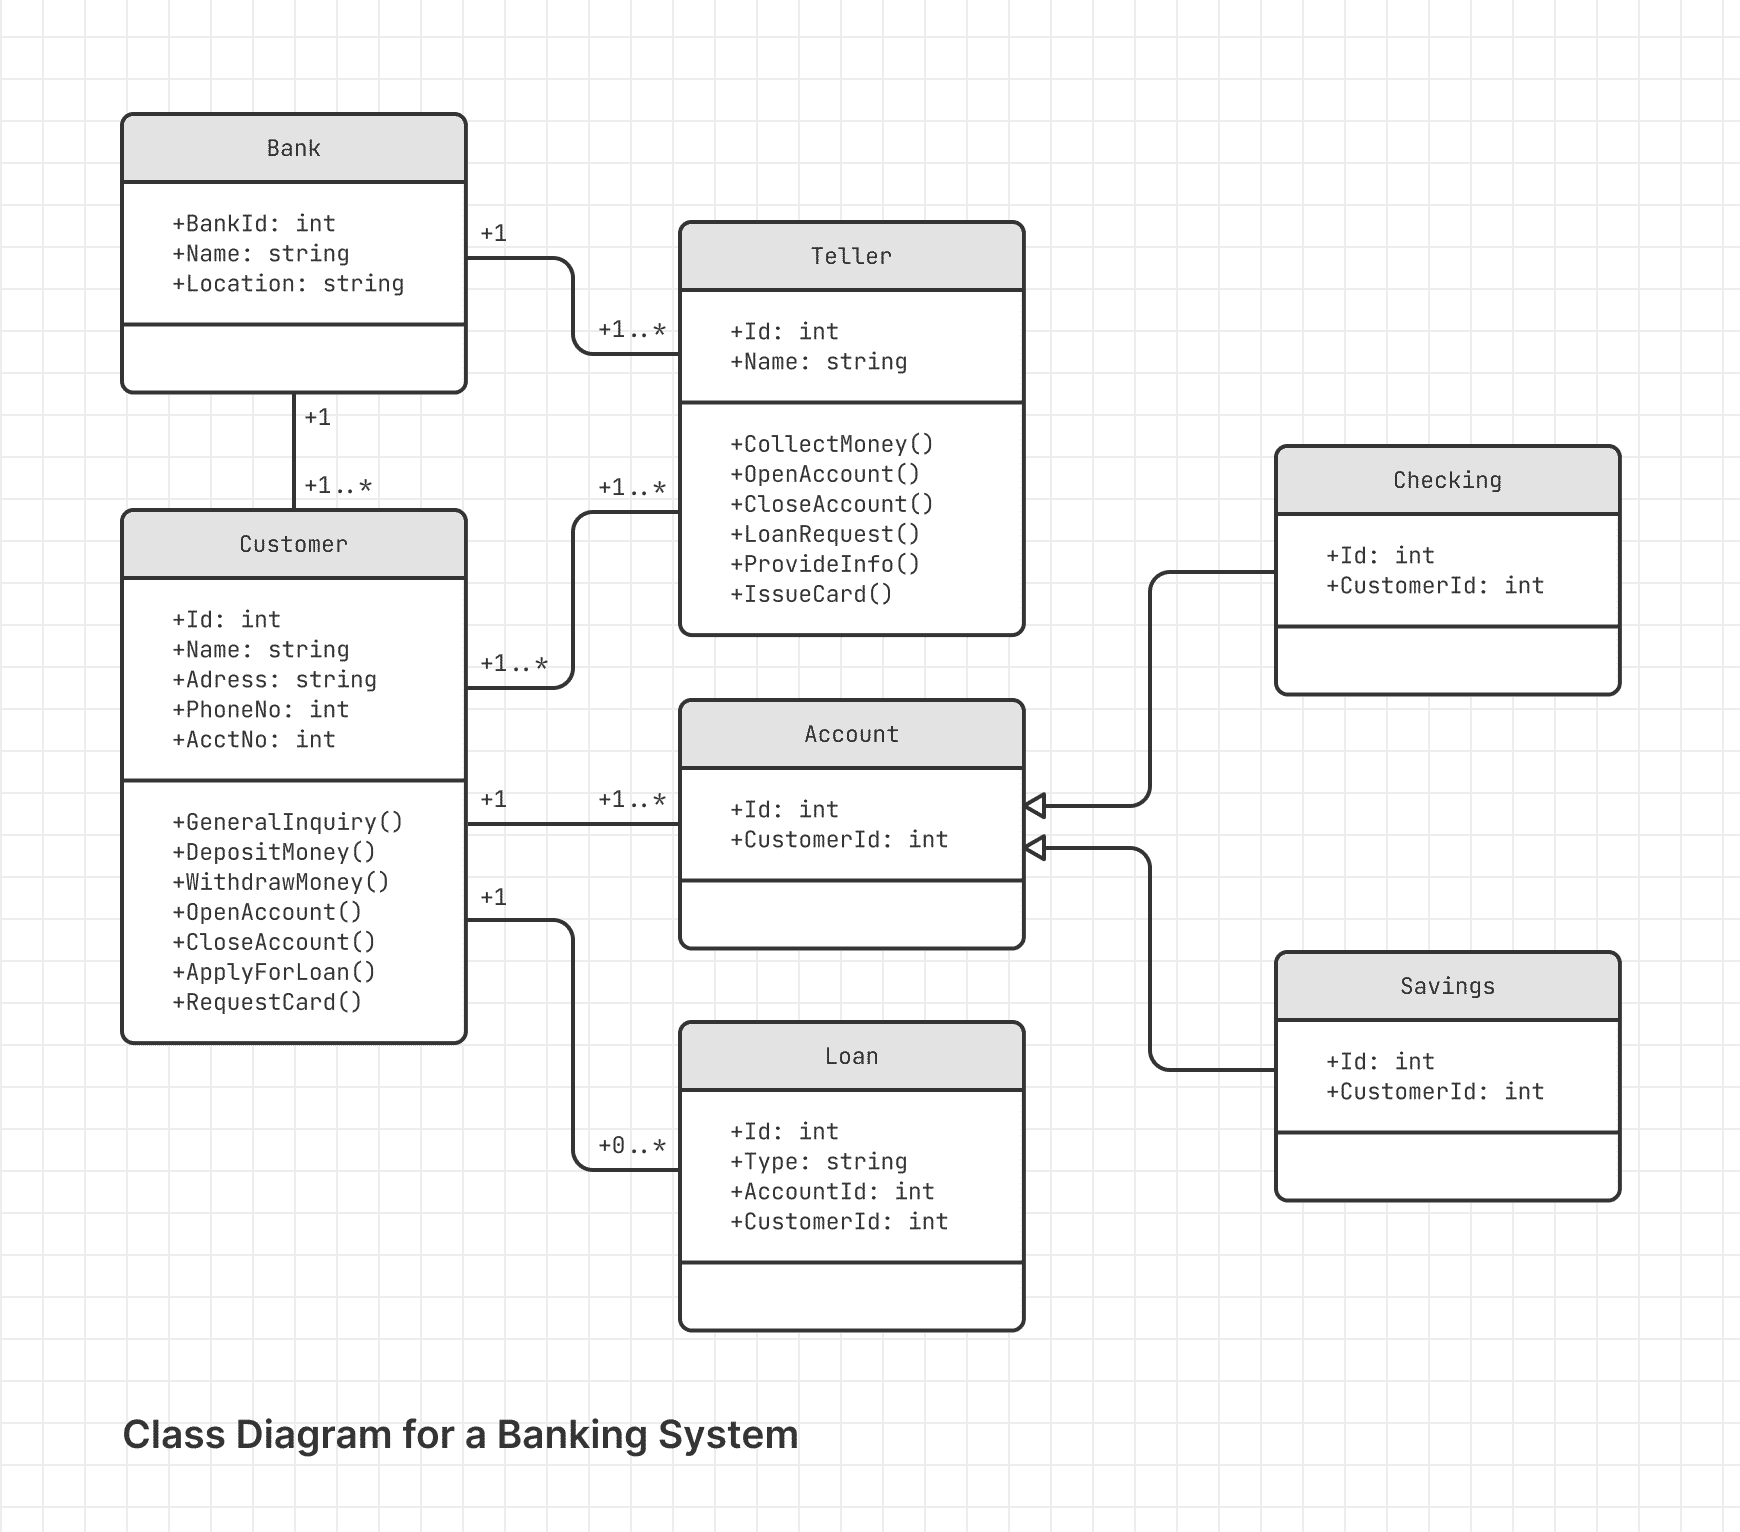

In [23]:
gray_img

In [24]:
# Convert PIL Image to numpy array
np_img = np.array(gray_img)

np_blurred = cv2.GaussianBlur(np_img, (7,7), 0)


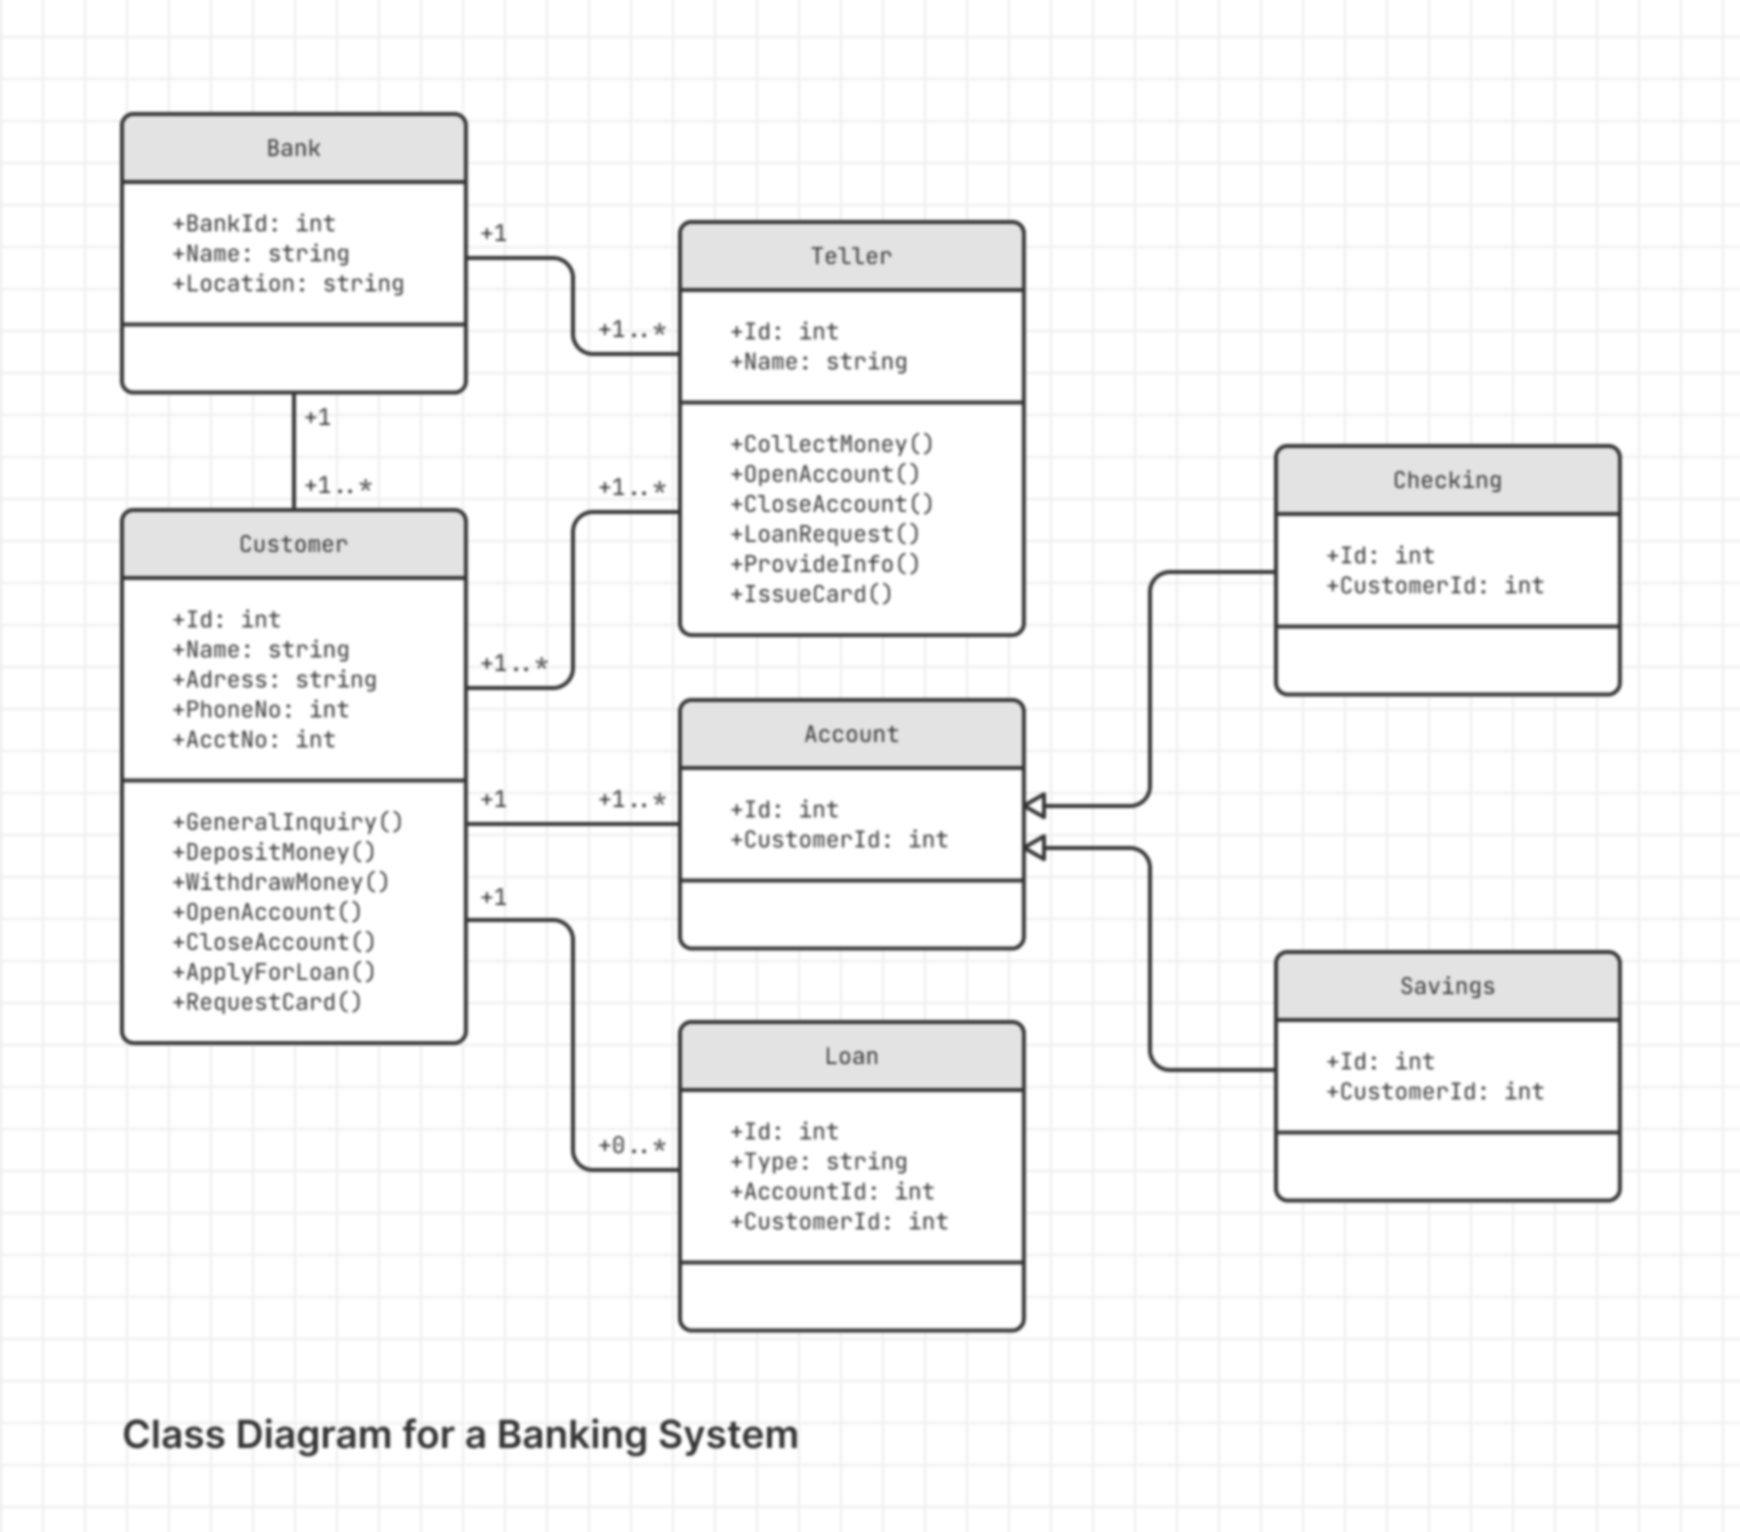

In [25]:
Image.fromarray(np_blurred)

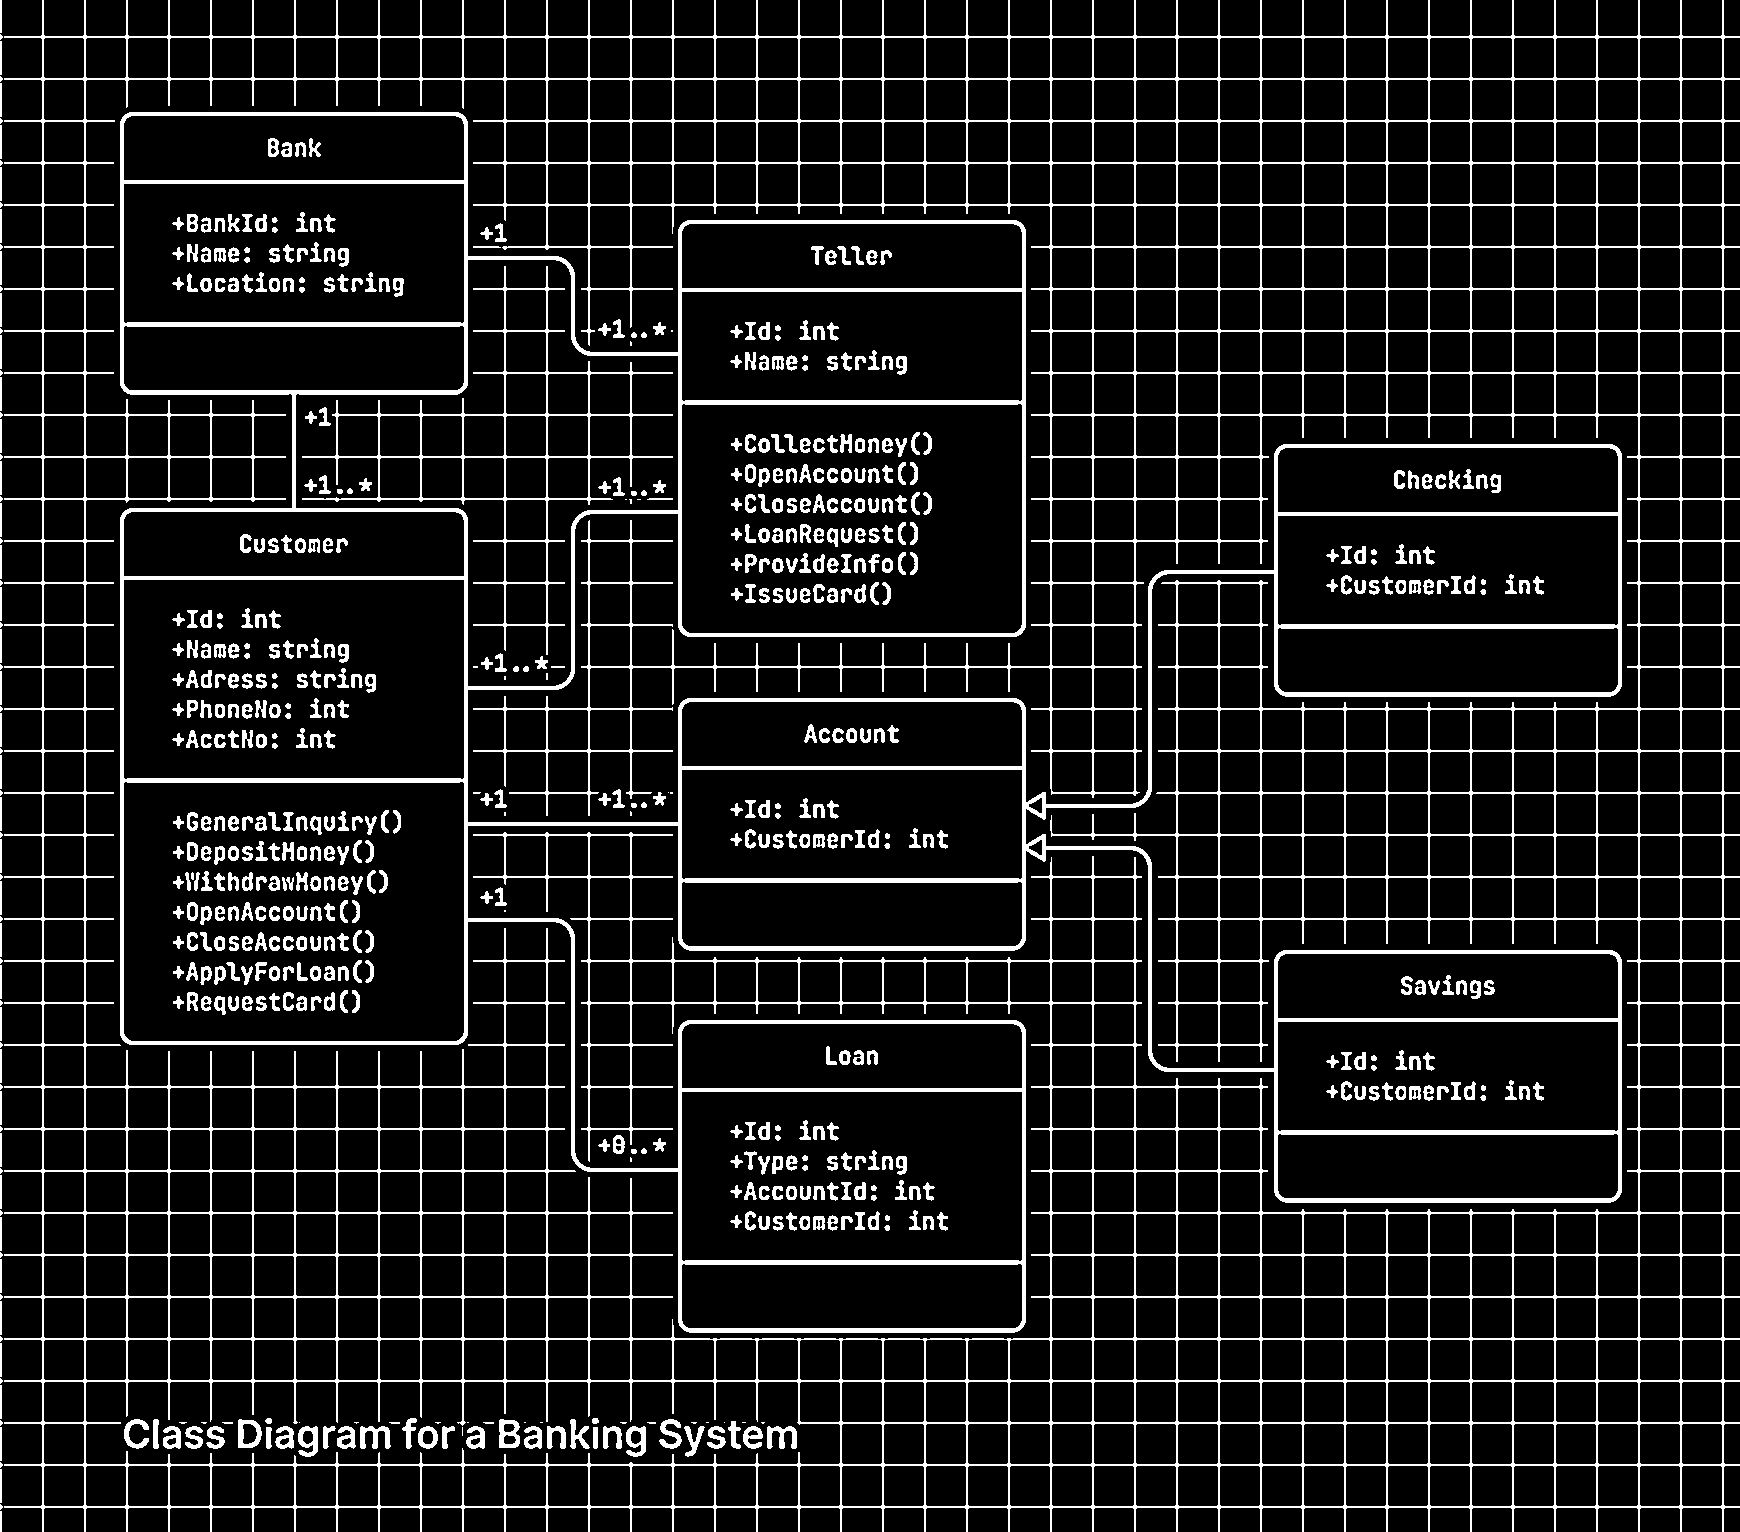

In [26]:
# Apply adaptive thresholding
binary = cv2.adaptiveThreshold(np_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
Image.fromarray(binary)

In [27]:
# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [28]:
# Create a mask for exterior edges
exterior_edges_mask = np.zeros_like(binary)

In [29]:
for contour in contours:
    area = cv2.contourArea(contour)

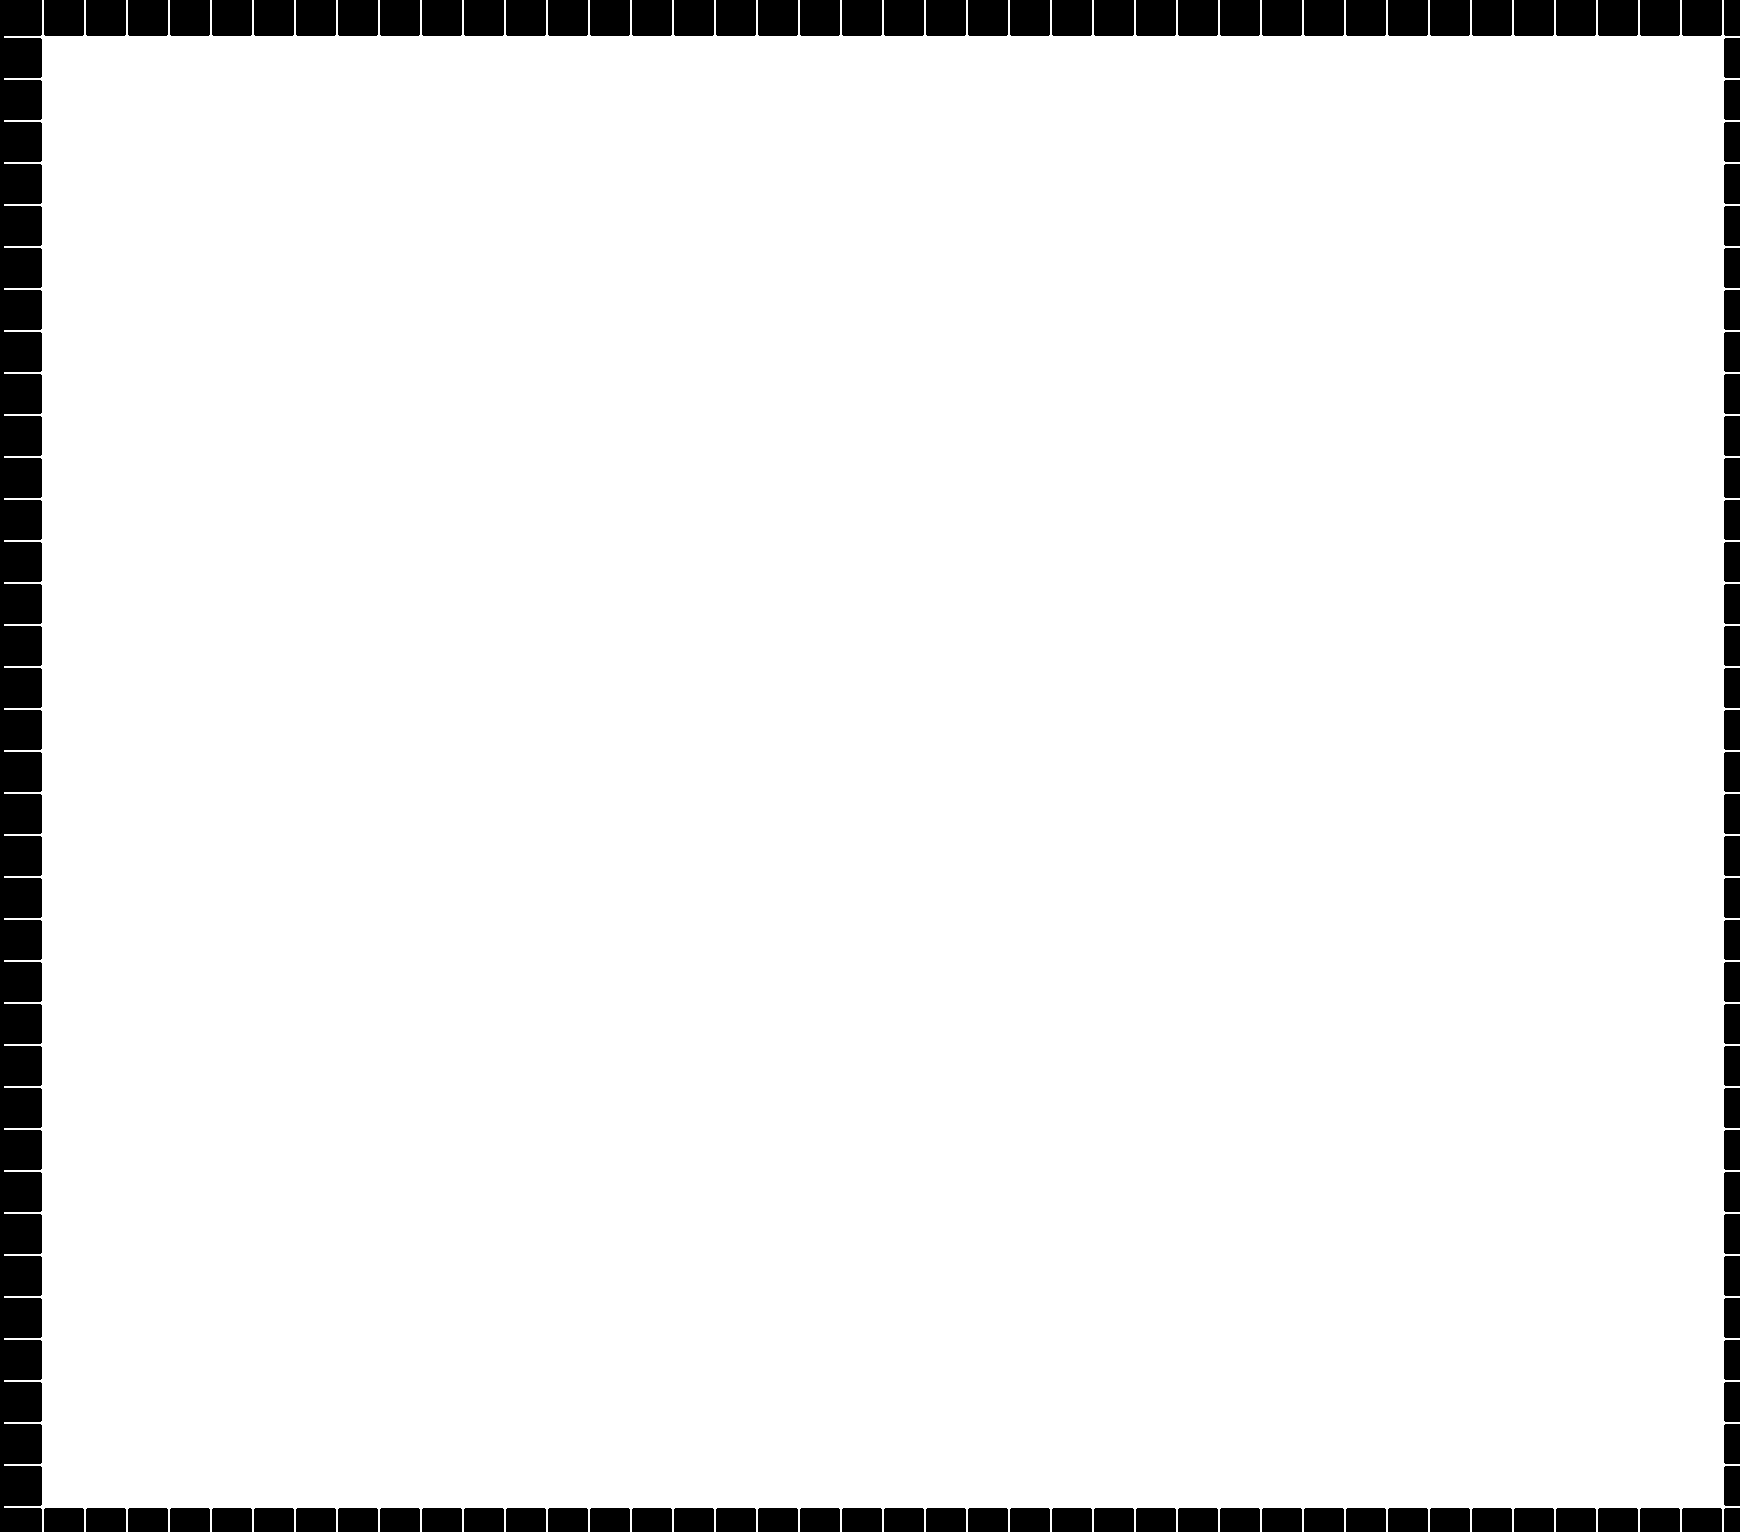

In [30]:
# Draw filled contours on the mask
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000:  # Adjust this threshold based on the size of the UML diagram components
        cv2.drawContours(exterior_edges_mask, [contour], -1, (255), thickness=cv2.FILLED)

# Apply erosion and d
Image.fromarray(exterior_edges_mask)

In [17]:
kernel = np.ones((1, 1), np.uint8)
exterior_edges_mask = cv2.erode(exterior_edges_mask, kernel, iterations=1)

In [18]:
smooth_mask = cv2.medianBlur(exterior_edges_mask, 3)
smooth_mask = cv2.GaussianBlur(smooth_mask, (3, 3), 0)

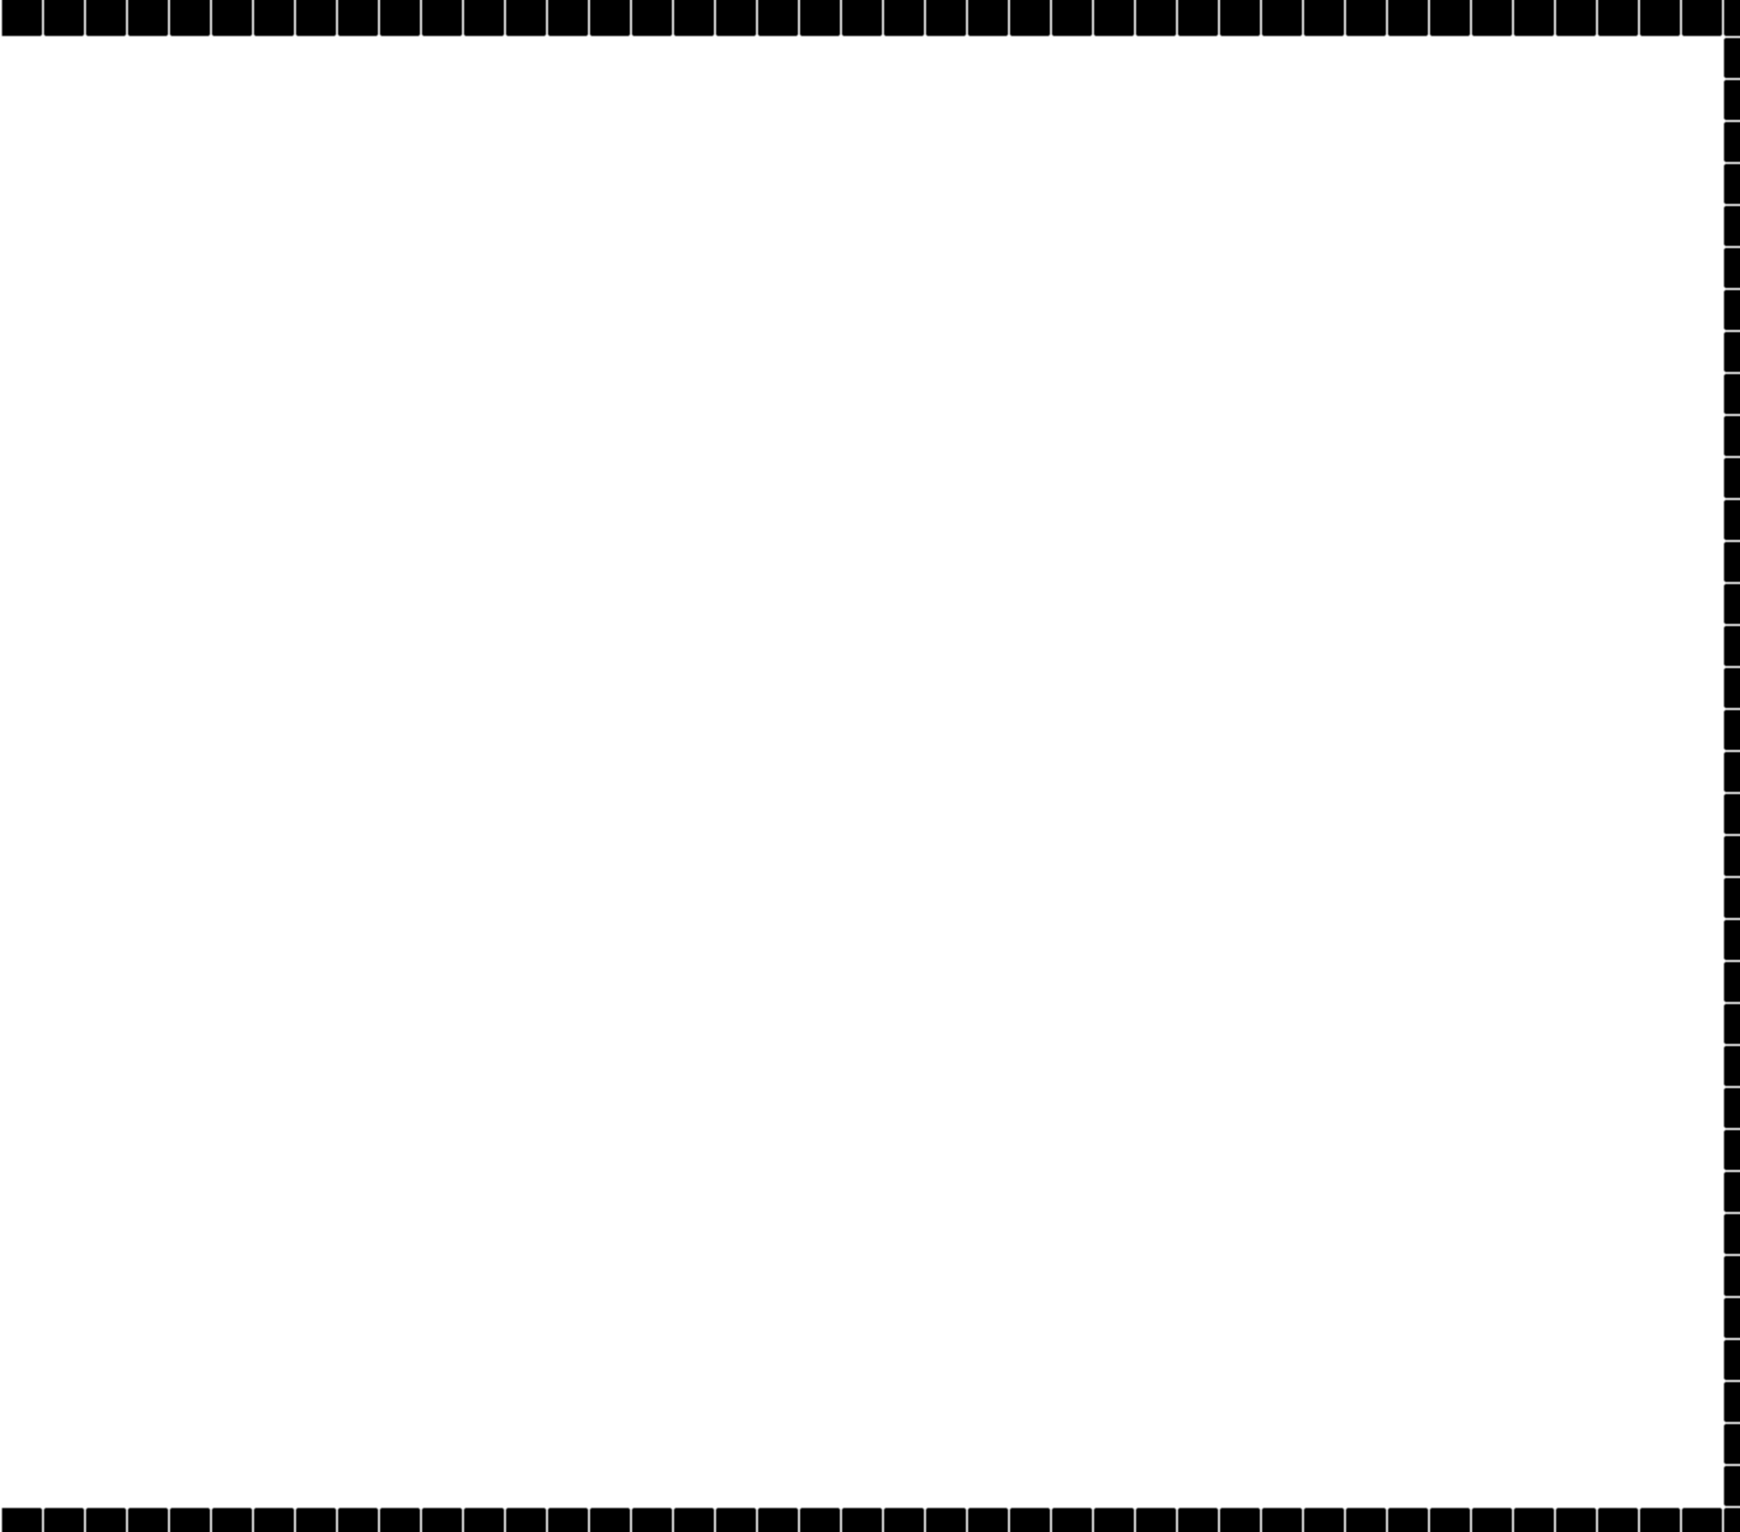

In [19]:

Image.fromarray(smooth_mask)

In [153]:
# Convert the image to RGBA mode
img = img.convert("RGBA")

# Invert the edges mask
inverted_edges_mask = 255 - smooth_mask

# Convert the inverted edges mask to PIL Image
inverted_edges_img = Image.fromarray(inverted_edges_mask, mode='L')

# Create a new image with alpha channel
new_img = Image.new("RGBA", img.size, (255, 255, 255, 0))

# Composite the original image and the inverted contour mask
new_img.paste(img, (0, 0), img)
new_img.paste((255, 255, 255, 0), (0, 0), inverted_edges_img)


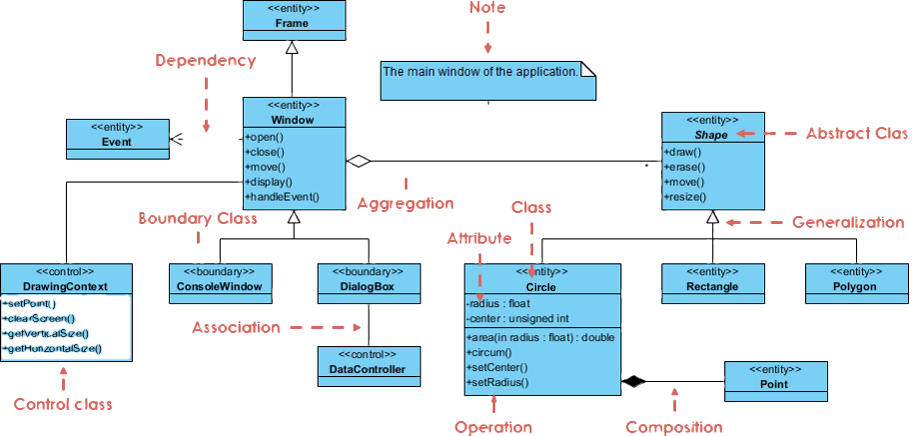

In [154]:
new_img

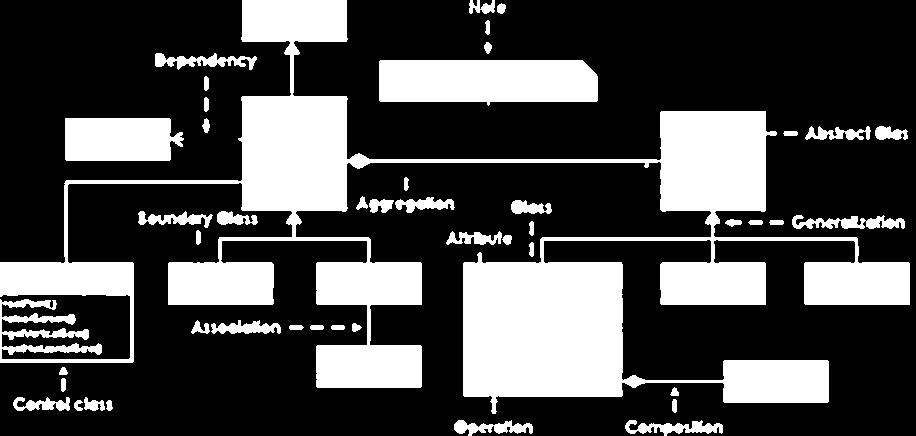

In [155]:
# Apply erosion and dilation for refining the contour
kernel = np.ones((1, 1), np.uint8)

exterior_edges_mask = cv2.erode(exterior_edges_mask, kernel, iterations=1)
Image.fromarray(exterior_edges_mask)

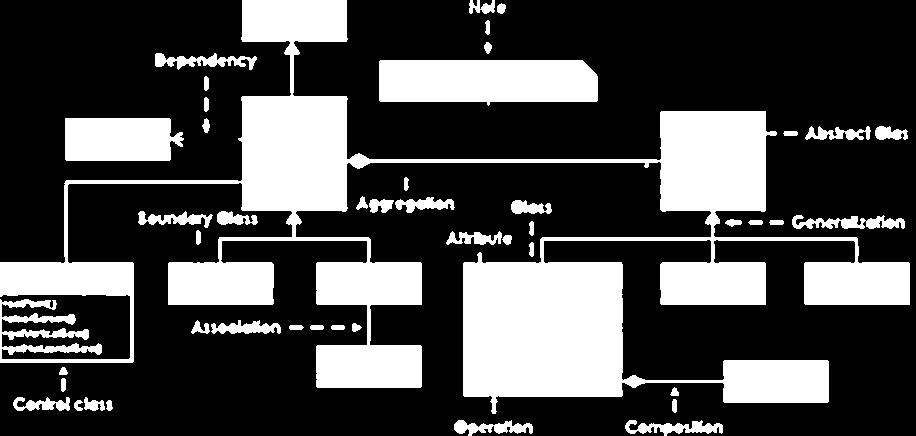

In [156]:

exterior_edges_mask = cv2.dilate(exterior_edges_mask, kernel, iterations=1)
Image.fromarray(exterior_edges_mask)

In [157]:

# apply morphology




#  Smoothen the mask



In [158]:
contours

(array([[[629, 420]],
 
        [[626, 423]],
 
        [[626, 424]],
 
        [[625, 425]],
 
        [[625, 428]],
 
        [[626, 429]],
 
        [[626, 430]],
 
        [[628, 432]],
 
        [[629, 432]],
 
        [[630, 433]],
 
        [[634, 433]],
 
        [[637, 430]],
 
        [[638, 430]],
 
        [[640, 432]],
 
        [[641, 432]],
 
        [[642, 433]],
 
        [[643, 433]],
 
        [[644, 432]],
 
        [[645, 432]],
 
        [[647, 430]],
 
        [[649, 432]],
 
        [[650, 432]],
 
        [[651, 431]],
 
        [[650, 430]],
 
        [[650, 428]],
 
        [[652, 426]],
 
        [[653, 426]],
 
        [[654, 427]],
 
        [[654, 432]],
 
        [[656, 432]],
 
        [[656, 428]],
 
        [[658, 426]],
 
        [[660, 428]],
 
        [[660, 431]],
 
        [[662, 431]],
 
        [[664, 433]],
 
        [[664, 435]],
 
        [[666, 435]],
 
        [[666, 434]],
 
        [[668, 432]],
 
        [[670, 432]],
 
        [[672, 4

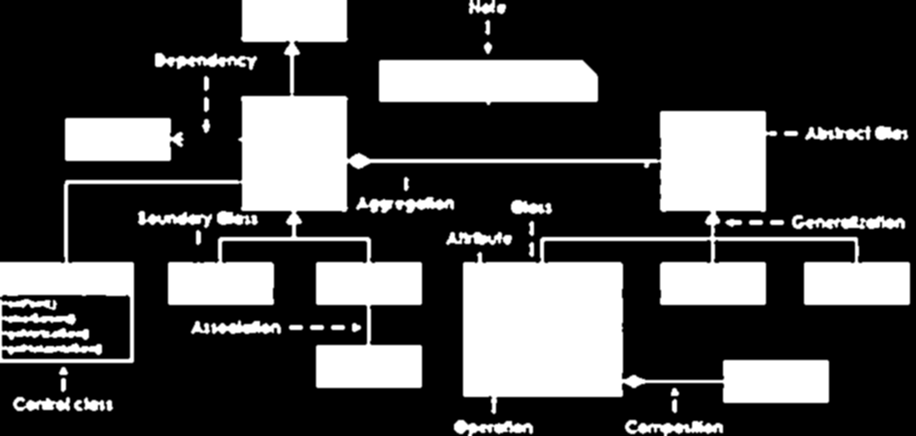

In [159]:
Image.fromarray(smooth_mask)

In [160]:
image=cv2.imread(image_path)

In [161]:

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use adaptive thresholding to segment foreground from background
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assuming it's the background)
max_contour = max(contours, key=cv2.contourArea)

# Create a mask from the largest contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, [max_contour], -1, (255), -1)

# Invert the mask
mask = cv2.bitwise_not(mask)

# Apply the mask to the original image
result = cv2.bitwise_and(image, image, mask=mask)


In [162]:
contours

(array([[[707, 427]],
 
        [[707, 429]],
 
        [[709, 429]],
 
        [[709, 427]]], dtype=int32),
 array([[[677, 427]],
 
        [[677, 429]],
 
        [[679, 429]],
 
        [[679, 427]]], dtype=int32),
 array([[[667, 427]],
 
        [[667, 429]],
 
        [[669, 429]],
 
        [[669, 427]]], dtype=int32),
 array([[[642, 427]],
 
        [[641, 428]],
 
        [[642, 429]],
 
        [[643, 429]],
 
        [[644, 428]],
 
        [[643, 427]]], dtype=int32),
 array([[[517, 427]],
 
        [[516, 428]],
 
        [[517, 429]],
 
        [[518, 429]],
 
        [[518, 427]]], dtype=int32),
 array([[[497, 427]],
 
        [[497, 429]],
 
        [[499, 429]],
 
        [[499, 427]]], dtype=int32),
 array([[[472, 427]],
 
        [[472, 429]],
 
        [[474, 429]],
 
        [[474, 427]]], dtype=int32),
 array([[[459, 424]],
 
        [[458, 425]],
 
        [[458, 428]],
 
        [[459, 429]],
 
        [[462, 429]],
 
        [[463, 428]],
 
        [[463, 425]],

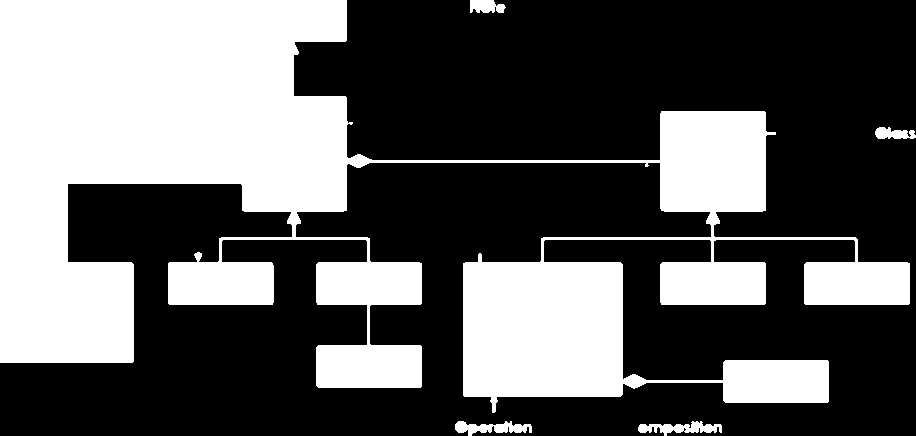

In [163]:
Image.fromarray(mask)